#决策树预测泰坦尼克号乘客生还可能性

In [85]:
import pandas as pd
import numpy as np
titanic_train=pd.read_csv('https://storage.googleapis.com/kagglesdsdata/competitions/3136/26502/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1709100985&Signature=DFF4Bod2W4qZD9agKIIYayk0ZyBFSXJCpSLb8t8EOKCZy6CEfH4tACCLjI%2Fj0SyrD60QDQcGHamKubD%2Foo57p9ZpTkxsPL85xUkT4H%2Brk88Fr8SYdjS1PaH3Il877gejOM3jLyWJ7NE9Mt9dn4JyiLs80y2Ixt2i9v2jxgsVOI4YXH6ali%2BSv3UnW639f%2FTGtMzrH2jmN1IkfNSkH3%2BRzChIFAdOxOXy7TSK6EwBf01%2Bwpcj4dC18uItIC0qexMHreikeOvXx4PtSuYRy4vXU5s9UfmcbjxeF72muZS%2F3h%2Fd4Cz2Emeum4Y0xgjfJ5obY%2FIGEHcDeaYDwvTmdAlN3Q%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv')
titanic_test=pd.read_csv('https://storage.googleapis.com/kagglesdsdata/competitions/3136/26502/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1709101066&Signature=iDyts7b3uPpxMqDJqARKA4D2%2Bn5SjciGnzfSxY5VXimbEJdiKN%2FAFa9ctqJdhDojMdP9C1dNzYk9mAUJ0N%2FbMee%2FlOygZ3CJW4PfaX9h9NmuhUUvtjdCAYORAjcSFbYOb9w7kqzutYz%2BmPnFrssqILIfD2vt1D%2FX01U0cYoLnWmbFo7dcGgIOtD%2FeBzesnW8NhkyOycRS4wSngK%2BlCRTzeN23fcsPrNljiRsWE2tv%2F2oEgTPwkCHFyeMe8RoTh6qneJZhw2cv04WUec881C2jT2x8d2UlR9FApWsKtYHvnTcfIE%2FUXL8q3vaIeOA7lpZ6rrh0PJNGwODE7fgLx8%2BIA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv')
titanic=pd.concat([titanic_train,titanic_test],axis=0)

In [42]:
print(titanic_train.shape)
print(titanic_test.shape)
print(titanic.shape)
print(titanic.iloc[890])
titanic.info()

(891, 12)
(418, 11)
(1309, 12)
PassengerId                    891
Survived                       0.0
Pclass                           3
Name           Dooley, Mr. Patrick
Sex                           male
Age                           32.0
SibSp                            0
Parch                            0
Ticket                      370376
Fare                          7.75
Cabin                          NaN
Embarked                         Q
Name: 890, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64 

In [21]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [32]:
#选取船舱等级、年纪、性别作为主要预测特征
X=titanic[['Pclass','Age','Sex']]
y=titanic['Survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  1309 non-null   int64  
 1   Age     1046 non-null   float64
 2   Sex     1309 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 40.9+ KB


In [33]:
#age需要补充
#sex与pclass都是类别型的，需要转化为数值特征
#使用平均数或者中位数补充空数据都是对模型偏离造成最小影响的策略
X['Age'].fillna(X['Age'].mean(),inplace=True)#inplace表示在原始DataFrame中原地修改，不返回新的数据
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  1309 non-null   int64  
 1   Age     1309 non-null   float64
 2   Sex     1309 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 40.9+ KB


<ipython-input-33-cb723ca5be49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(),inplace=True)#inplace表示在原始DataFrame中原地修改，不返回新的数据


In [54]:
#把类别类型的特征转化为独热编码
X=pd.get_dummies(X,columns=['Pclass','Sex'])
X

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.000000,0,0,1,0,1
1,38.000000,1,0,0,1,0
2,26.000000,0,0,1,1,0
3,35.000000,1,0,0,1,0
4,35.000000,0,0,1,0,1
...,...,...,...,...,...,...
413,29.881138,0,0,1,0,1
414,39.000000,1,0,0,1,0
415,38.500000,0,0,1,0,1
416,29.881138,0,0,1,0,1


In [72]:
#数据分割
x_train,x_test=X.iloc[:titanic_train.shape[0],:],X.iloc[titanic_train.shape[0]:,:]
y_train,y_test=y.iloc[:titanic_train.shape[0]],y.iloc[titanic_train.shape[0]:]
x_train,y_train=x_train.to_numpy(),y_train.to_numpy()
x_test,y_test=x_test.to_numpy(),y_test.to_numpy()
print(x_train.shape)
print(y_train.shape)

(891, 6)
(891,)


In [87]:
#检查数据分割是否正确
y_train=np.int64(y_train)

In [88]:
#导入决策树分类器
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_predict=dtc.predict(x_test)
output=pd.DataFrame({'PassengerId':titanic_test.PassengerId,'Survived':y_predict})
output.to_csv('submission.csv',index=False)

In [89]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


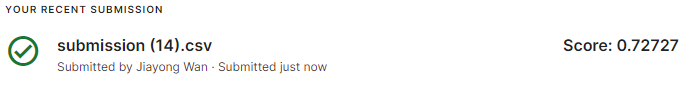